In [1]:
import numpy as numpy
import pandas as pd

In [2]:
data = pd.read_csv('../data/data.csv')
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [3]:
data.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [4]:
len(data['equipment_energy_consumption'])

16857

In [5]:
data['equipment_energy_consumption'] = pd.to_numeric(
    data['equipment_energy_consumption'], errors='coerce'
)

In [6]:
data['lighting_energy'] = pd.to_numeric(
    data['lighting_energy'], errors='coerce'
)

In [7]:
total_neg_value_energy_equipment = (data['equipment_energy_consumption']<0).sum()


In [8]:
total_neg_value_energy_equipment

314

In [9]:
total_neg_value_lighting_energy = (data['lighting_energy']<0).sum()
total_neg_value_lighting_energy

229

In [10]:
coulmns = data.columns.difference(['timestamp'])

In [11]:
data[coulmns] = data[coulmns].apply(pd.to_numeric, errors='coerce')

In [12]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [13]:
positive_columns = data.columns.difference(['dew_point','timestamp'])
data[positive_columns] = data[positive_columns].abs()

In [14]:
columns = data.columns.difference(['timestamp'])

In [15]:
data.fillna(data.mean(), inplace=True)


In [16]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,77.787786,33.746609,47.596667,19.2,44.790000,19.79,39.139170,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.239922,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [17]:
data.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

In [18]:
'''import matplotlib.pyplot as plt

target_col = 'equipment_energy_consumption' 
features = [col for col in data.columns if col != target_col]

n = len(features)
cols = 3  # Number of subplots per row
rows = (n + cols - 1) // cols  # Ceiling division to get number of rows

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(data[col], data[target_col], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f'{col} vs {target_col}')
    plt.tight_layout()

plt.suptitle(f'Scatter Plots of Each Column vs "{target_col}"', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()'''


'import matplotlib.pyplot as plt\n\ntarget_col = \'equipment_energy_consumption\' \nfeatures = [col for col in data.columns if col != target_col]\n\nn = len(features)\ncols = 3  # Number of subplots per row\nrows = (n + cols - 1) // cols  # Ceiling division to get number of rows\n\nplt.figure(figsize=(5 * cols, 4 * rows))\n\nfor i, col in enumerate(features):\n    plt.subplot(rows, cols, i + 1)\n    plt.scatter(data[col], data[target_col], alpha=0.6)\n    plt.xlabel(col)\n    plt.ylabel(target_col)\n    plt.title(f\'{col} vs {target_col}\')\n    plt.tight_layout()\n\nplt.suptitle(f\'Scatter Plots of Each Column vs "{target_col}"\', fontsize=16, y=1.02)\nplt.tight_layout()\nplt.show()'

In [19]:
'''import matplotlib.pyplot as plt

target_col = 'equipment_energy_consumption' 
features = [col for col in data.columns if col != target_col]

n = len(features)
cols = 3  # Number of subplots per row
rows = (n + cols - 1) // cols  # Ceiling division to get number of rows

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(data[col], data[target_col], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f'{col} vs {target_col}')
    plt.xscale('log')
    plt.yscale('log')

    plt.tight_layout()

plt.suptitle(f'Scatter Plots of Each Column vs "{target_col}"', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()'''

'import matplotlib.pyplot as plt\n\ntarget_col = \'equipment_energy_consumption\' \nfeatures = [col for col in data.columns if col != target_col]\n\nn = len(features)\ncols = 3  # Number of subplots per row\nrows = (n + cols - 1) // cols  # Ceiling division to get number of rows\n\nplt.figure(figsize=(5 * cols, 4 * rows))\n\nfor i, col in enumerate(features):\n    plt.subplot(rows, cols, i + 1)\n    plt.scatter(data[col], data[target_col], alpha=0.6)\n    plt.xlabel(col)\n    plt.ylabel(target_col)\n    plt.title(f\'{col} vs {target_col}\')\n    plt.xscale(\'log\')\n    plt.yscale(\'log\')\n\n    plt.tight_layout()\n\nplt.suptitle(f\'Scatter Plots of Each Column vs "{target_col}"\', fontsize=16, y=1.02)\nplt.tight_layout()\nplt.show()'

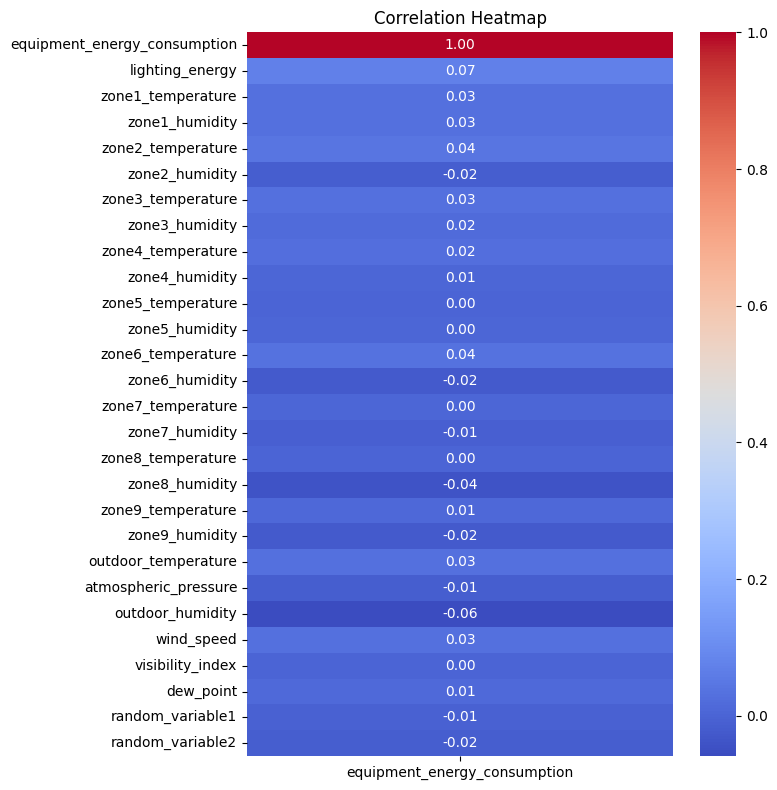

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr[['equipment_energy_consumption']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

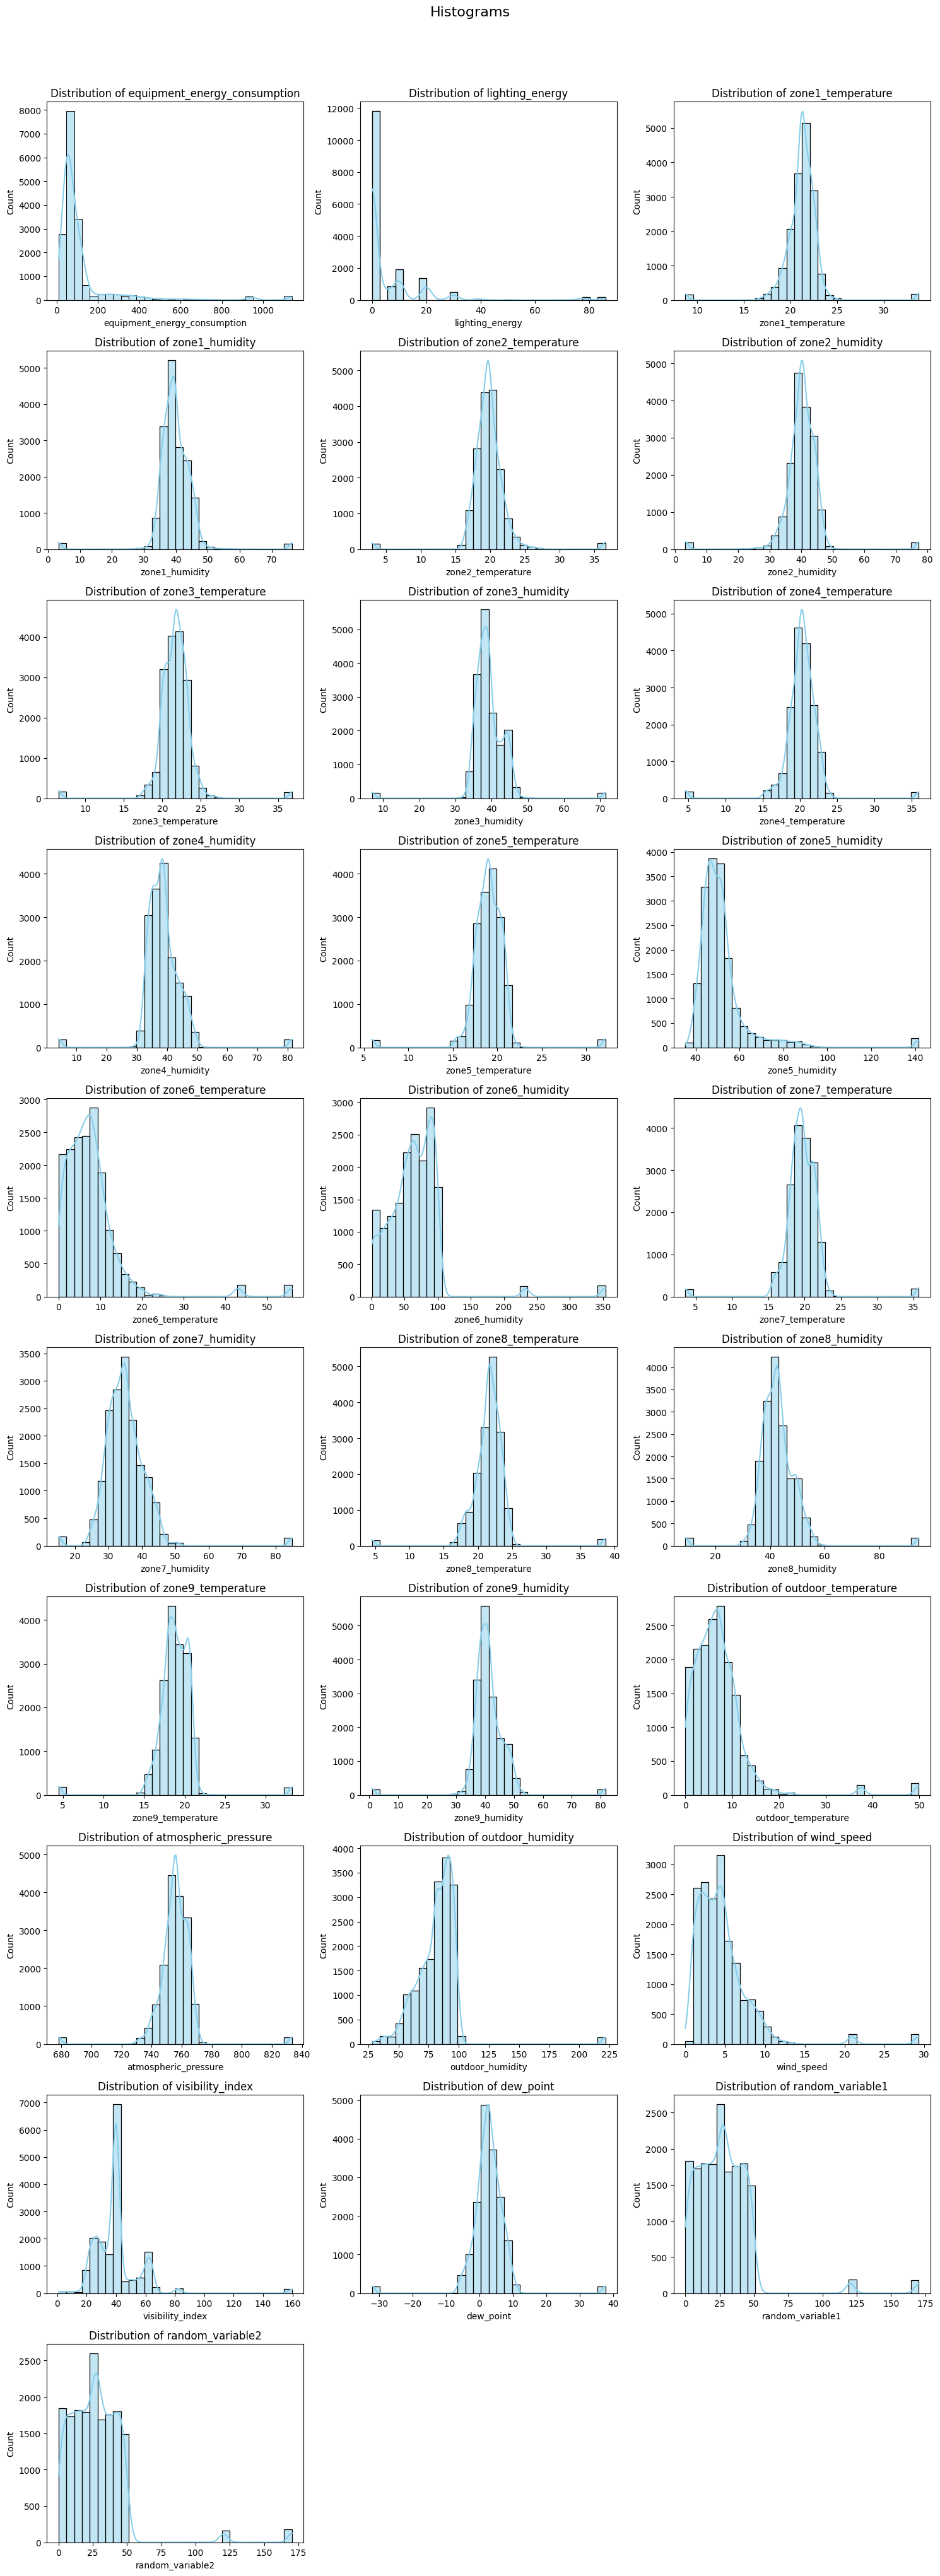

In [21]:
numeric_cols = data.select_dtypes(include='number').columns  # Only numeric columns

n = len(numeric_cols)
cols = 3  # Number of plots per row
rows = (n + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Histograms', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



In [22]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,77.787786,33.746609,47.596667,19.2,44.790000,19.79,39.139170,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.239922,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


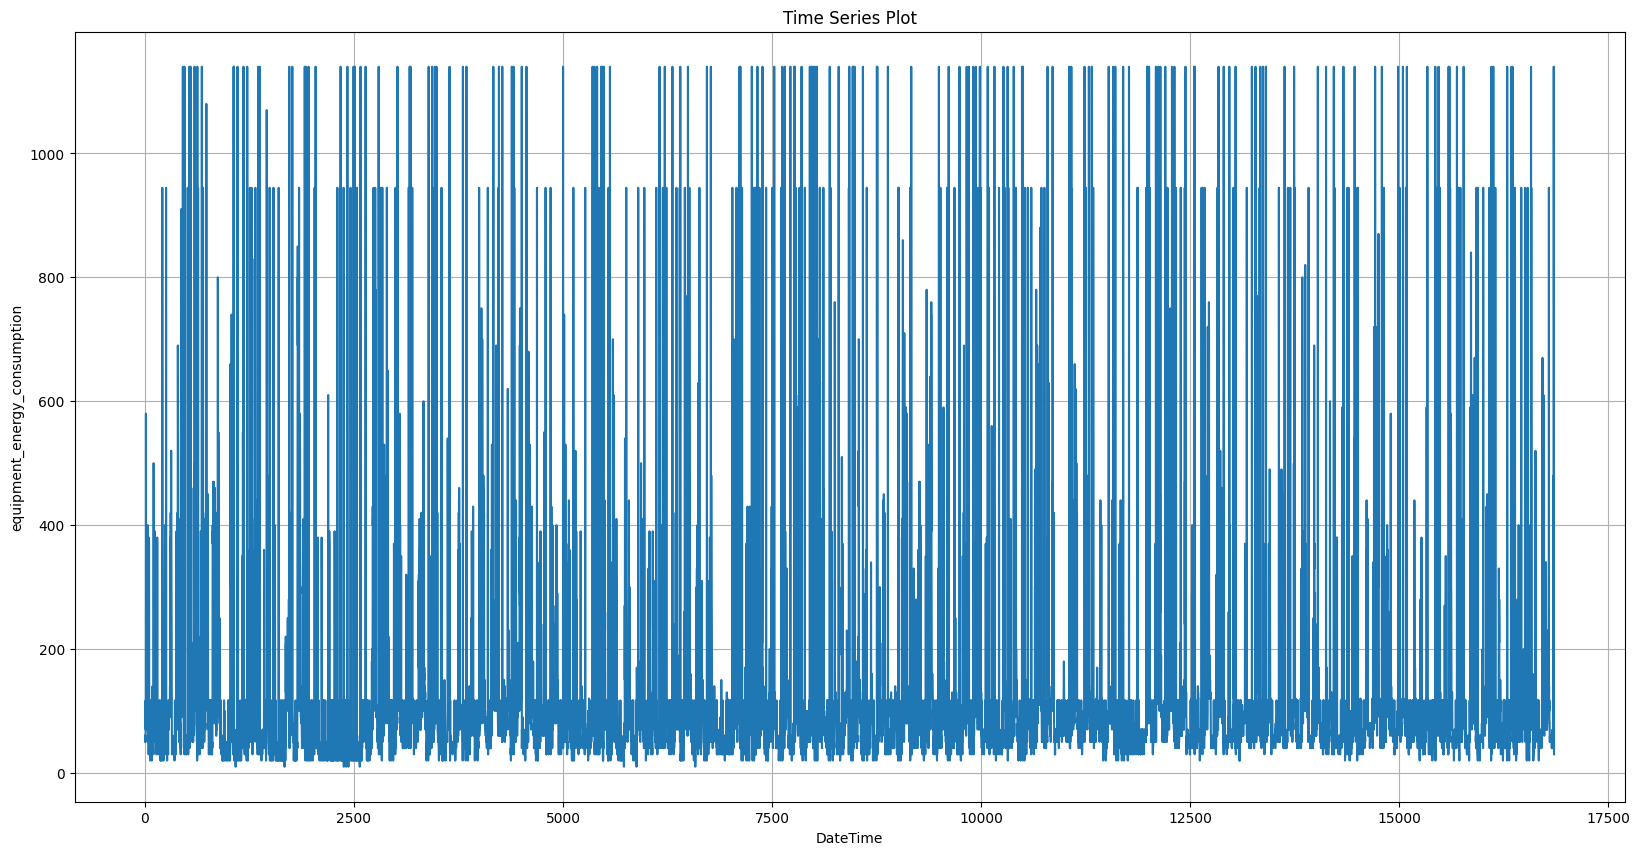

In [24]:

import matplotlib.pyplot as plt
data['equipment_energy_consumption'].plot(figsize=(20, 10), title='Time Series Plot')
plt.ylabel('equipment_energy_consumption')
plt.xlabel('DateTime')
plt.grid(True)
plt.show()

In [ ]:
data.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [ ]:
data.describe()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15945.000000,15993.000000,15908.000000,15969.000000,15934.000000,15990.000000,16055.000000,15979.000000,16041.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,117.082359,5.797220,21.249414,39.798402,19.793113,40.216501,21.665733,39.139170,20.239922,...,18.851085,41.240085,7.152878,755.757602,81.744142,4.637325,40.325249,2.783507,27.703503,27.512035
min,2016-01-11 17:00:00,10.000000,0.000000,8.726818,3.348060,2.988199,3.193842,6.543921,6.902515,4.613485,...,4.476511,0.918228,0.000000,678.159940,28.000000,0.000000,1.000000,-32.098095,0.005322,0.005322
25%,2016-02-09 21:20:00,50.000000,0.000000,20.500000,37.090000,18.600000,37.860000,20.533333,36.700000,19.266667,...,17.890000,38.290000,3.300000,750.800000,71.666667,2.000000,29.000000,0.450000,12.751380,12.671575
50%,2016-03-10 00:10:00,60.000000,0.000000,21.323333,39.290000,19.600000,40.360000,21.767500,38.400000,20.290000,...,18.890000,40.433333,6.083333,756.200000,84.500000,4.000000,40.000000,2.750000,25.395205,25.304506
75%,2016-04-08 03:40:00,100.000000,10.000000,22.100000,42.530000,20.790000,43.000000,22.760000,41.537500,21.356667,...,20.200000,43.826667,9.391667,762.100000,92.000000,6.000000,40.000000,5.308333,38.574059,38.527463
max,2016-12-01 15:50:00,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,169.911547,13.946071,2.165618,6.303286,2.943771,6.712391,2.594309,5.510879,2.783050,...,2.528783,7.038977,6.676793,13.643585,19.269796,3.942969,17.530047,6.094732,23.184062,22.896146


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example: Let's say you're predicting target_column
X = data.drop(['equipment_energy_consumption','timestamp'], axis=1)  # Features
y = data['equipment_energy_consumption']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = rf.feature_importances_
# Convert to percentage
importance_percent = 100.0 * (feature_importances / feature_importances.sum())


# Create a DataFrame with features and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_percent
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                 Feature  Importance
10        zone5_humidity    4.855751
2         zone1_humidity    4.690766
12        zone6_humidity    4.473397
20  atmospheric_pressure    4.397338
15     zone8_temperature    4.347588
16        zone8_humidity    4.206687
4         zone2_humidity    4.193941
11     zone6_temperature    4.182115
18        zone9_humidity    4.150516
21      outdoor_humidity    4.080430
14        zone7_humidity    3.922268
6         zone3_humidity    3.799984
19   outdoor_temperature    3.786637
23      visibility_index    3.721119
3      zone2_temperature    3.701504
25      random_variable1    3.610642
5      zone3_temperature    3.587880
8         zone4_humidity    3.581106
22            wind_speed    3.497500
24             dew_point    3.347665
7      zone4_temperature    3.300009
9      zone5_temperature    3.200330
26      random_variable2    3.174985
1      zone1_temperature    2.844414
13     zone7_temperature    2.833709
17     zone9_temperature    2.345026
0

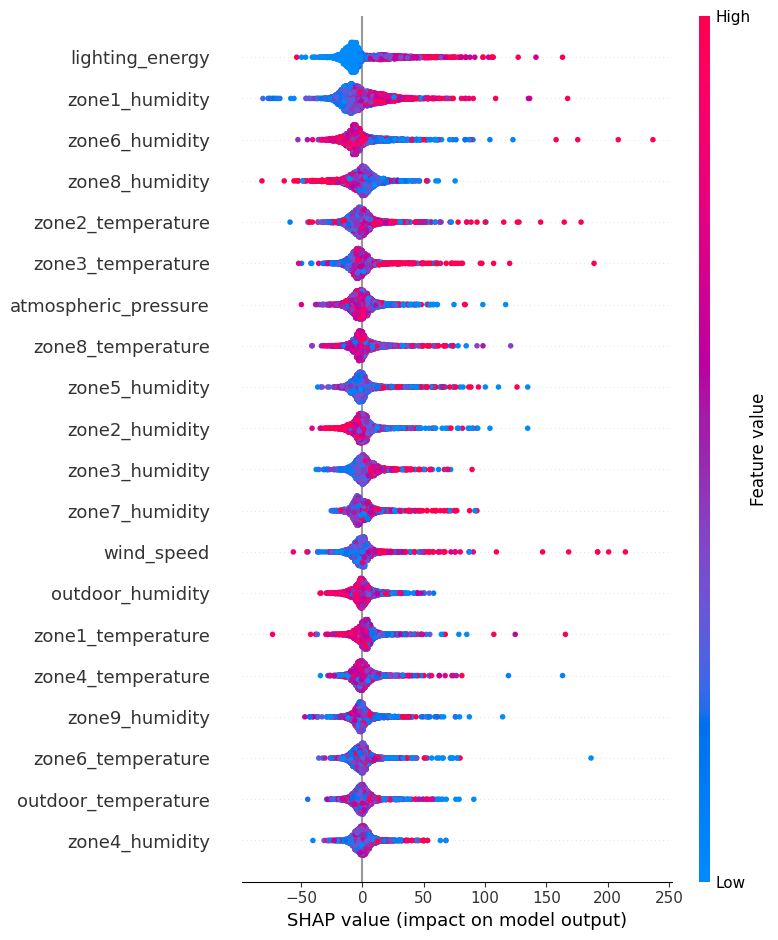

In [33]:
import shap
import xgboost as xgb

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Get SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot SHAP values for feature importance
shap.summary_plot(shap_values, X_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Define models and their hyperparameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0,100]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100,150,200],
            'max_depth': [5, 10,15,20, None]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Train, tune, and evaluate
results = []

for name, mp in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='neg_root_mean_squared_error')
    grid.fit(X_train_scaled, y_train_scaled)
    y_pred = grid.predict(X_test_scaled)
    
    rmse = root_mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test_scaled, y_pred)
    r2 = r2_score(y_test_scaled, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Training LinearRegression...
Training Ridge...


c:\Users\mitta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mitta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RandomForest...


c:\Users\mitta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training XGBoost...


c:\Users\mitta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training SVR...
